Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Functions

In [2]:
def normalise(dataset, name):
    mean = dataset[name].mean()
    std = dataset[name].std()
    dataset[name] = (dataset[name] - mean) / std

def compile_model(name, drop):
    model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(10)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu')
    ], name = name)
    if drop == True:
        model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

def history_data(history_train):
    f, ax = plt.subplots(ncols = 2, figsize = (12,6))
    ax[0].plot(history_train.history['accuracy'])
    ax[0].plot(history_train.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].set(ylabel = 'accuracy', xlabel = 'epoch')
    ax[0].legend(['train', 'validation'], loc='upper left')

    ax[1].plot(history_train.history['loss'])
    ax[1].plot(history_train.history['val_loss'])
    ax[1].set_title('model loss')
    ax[1].set(ylabel = 'loss', xlabel = 'epoch')
    ax[1].legend(['train', 'validation'], loc='upper right')

def performance_data(train, train_pred, test, test_pred):
    f, ax = plt.subplots(ncols = 2, figsize = (12,4))
    cm_train = confusion_matrix(train, train_pred)
    sb.heatmap(cm_train, fmt='.0f', annot = True, ax=ax[0])

    cm_test = confusion_matrix(test, test_pred)
    sb.heatmap(cm_test, fmt='.0f', annot = True, ax=ax[1])

    ax[0].set(xlabel='Predicted', ylabel='Actual', title='Training Performance')
    ax[1].set(xlabel='Predicted', ylabel='Actual', title='Testing Performance')

    plt.show()

Reading and reformatting data

In [3]:
phishdata_train = pd.read_csv('cleandataset.csv')
phishdata_train.head()


,url,total_of_www,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,domain_age,web_traffic,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,1,5,0,143,0.930070,0.069930,6678,78526,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,0,0,2,0,0.000000,0.000000,65,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,1,9,0,3,1.000000,0.000000,1707,0,1,0,phishing
3,http://www.jp519.com/,1,0,0,404,0.962871,0.037129,1331,0,0,0,legitimate
4,https://www.velocidrone.com/,1,0,0,57,0.684211,0.315789,1662,312044,0,4,legitimate


In [4]:
#Normalise numerical data and convert result(status) to 1=phishing, 0=legitamate
normalise(phishdata_train, 'total_of_www')
normalise(phishdata_train, 'longest_word_path')
normalise(phishdata_train, 'phish_hints')
normalise(phishdata_train, 'nb_hyperlinks')
normalise(phishdata_train, 'ratio_intHyperlinks')
normalise(phishdata_train, 'ratio_extHyperlinks')
normalise(phishdata_train, 'domain_age')
normalise(phishdata_train, 'web_traffic')
normalise(phishdata_train, 'page_rank')
#status
phishdata_train['status'] = phishdata_train['status'].map({'legitimate':0, 'phishing':1}).astype(int)

In [5]:
phishdata_train.head()

,url,total_of_www,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,domain_age,web_traffic,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,1.071800,-0.222970,-0.376671,0.283889,0.894864,-0.678962,0.645563,-0.370188,0,0.600571,1
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,-0.917636,-0.456733,2.114135,-0.527061,-1.591418,-0.894966,-1.722850,-0.411485,1,-1.365746,1
2,http://www.avevaconstruction.com/blesstool/ima...,1.071800,-0.035960,-0.376671,-0.510048,1.081803,-0.894966,-1.134776,-0.411485,1,-1.365746,1
3,http://www.jp519.com/,1.071800,-0.456733,-0.376671,1.764015,0.982550,-0.780281,-1.269438,-0.411485,0,-1.365746,0
4,https://www.velocidrone.com/,1.071800,-0.456733,-0.376671,-0.203815,0.237628,0.080462,-1.150892,-0.247382,0,0.207308,0


In [6]:
#Remove url as it is not needed
phishdata_train = phishdata_train.drop(['url'], axis=1)

In [7]:
#Convert pandas dataframe into numpy array and split into 0.75 train 0.25 test
data_train = phishdata_train.drop('status', axis=1).to_numpy()
status_train = phishdata_train['status'].to_numpy()

data_train, data_test, status_train, status_test = train_test_split(data_train, status_train, test_size=0.25)

Creating a basic neural network

In [8]:
model = compile_model('Basic', drop=False)
model.summary()

Model: "Basic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 34,689
Trainable params: 34,689
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(data_train, status_train, epochs=20, validation_split = 0.1)

Epoch 1/20
326/326 [==============================] - 1s 3ms/step - loss: 0.2076 - accuracy: 0.9246 - val_loss: 0.1864 - val_accuracy: 0.9240
Epoch 2/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1665 - accuracy: 0.9393 - val_loss: 0.1832 - val_accuracy: 0.9344
Epoch 3/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1535 - accuracy: 0.9433 - val_loss: 0.1771 - val_accuracy: 0.9249
Epoch 4/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1462 - accuracy: 0.9466 - val_loss: 0.1676 - val_accuracy: 0.9318
Epoch 5/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1397 - accuracy: 0.9484 - val_loss: 0.1674 - val_accuracy: 0.9370
Epoch 6/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1338 - accuracy: 0.9504 - val_loss: 0.1625 - val_accuracy: 0.9370
Epoch 7/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1302 - accuracy: 0.9518 - val_loss: 0.1636 - val_accuracy: 0.9361
Epoch 

121/121 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.9479


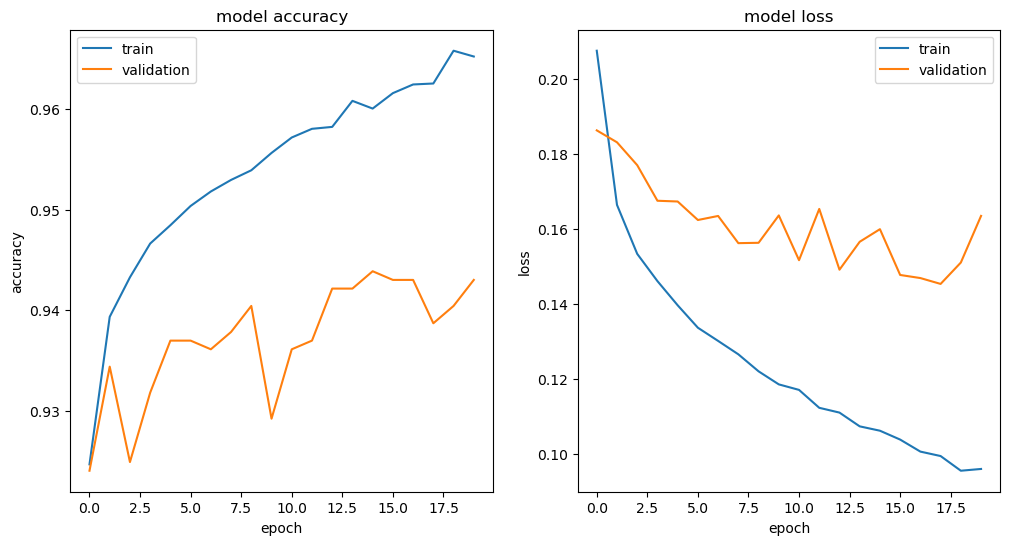

In [10]:
test_loss, test_acc = model.evaluate(data_test,  status_test, verbose=1) 

history_data(history)

121/121 [==============================] - 0s 1ms/step


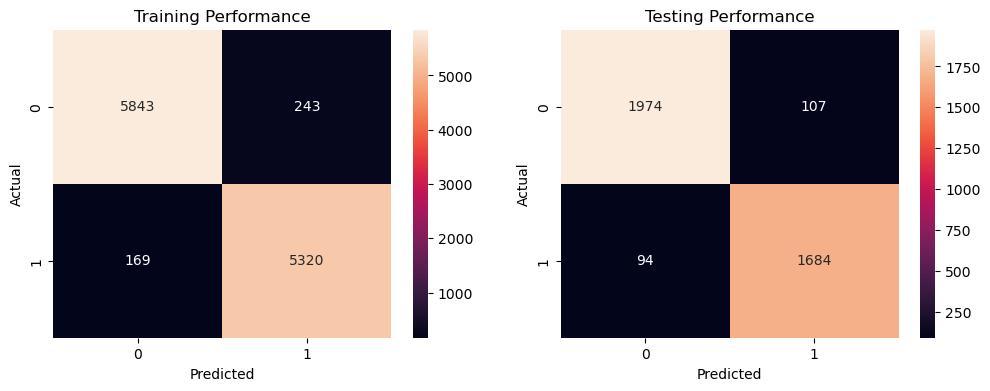

In [11]:
status_train_pred = (model.predict(data_train) >= 0.5).astype('int32')
status_test_pred = (model.predict(data_test) >= 0.5).astype('int32')
performance_data(status_train, status_train_pred, status_test, status_test_pred)

We can see that overfitting has caused a low validation accuracy and a high validation loss

Creating a neural network with dropout layers

In [12]:
model = compile_model('Dropout', drop=True)
model.summary()

Model: "Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1408      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 34,689
Trainable params: 34,689
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(data_train, status_train, epochs=20, validation_split = 0.1)

Epoch 1/20
326/326 [==============================] - 1s 3ms/step - loss: 0.2143 - accuracy: 0.9205 - val_loss: 0.1928 - val_accuracy: 0.9171
Epoch 2/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1676 - accuracy: 0.9380 - val_loss: 0.1869 - val_accuracy: 0.9214
Epoch 3/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1583 - accuracy: 0.9399 - val_loss: 0.1782 - val_accuracy: 0.9318
Epoch 4/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1517 - accuracy: 0.9435 - val_loss: 0.1804 - val_accuracy: 0.9249
Epoch 5/20
326/326 [==============================] - 1s 3ms/step - loss: 0.1457 - accuracy: 0.9450 - val_loss: 0.1815 - val_accuracy: 0.9275
Epoch 6/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1404 - accuracy: 0.9470 - val_loss: 0.1764 - val_accuracy: 0.9361
Epoch 7/20
326/326 [==============================] - 1s 2ms/step - loss: 0.1367 - accuracy: 0.9491 - val_loss: 0.1610 - val_accuracy: 0.9326
Epoch 

121/121 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.9497


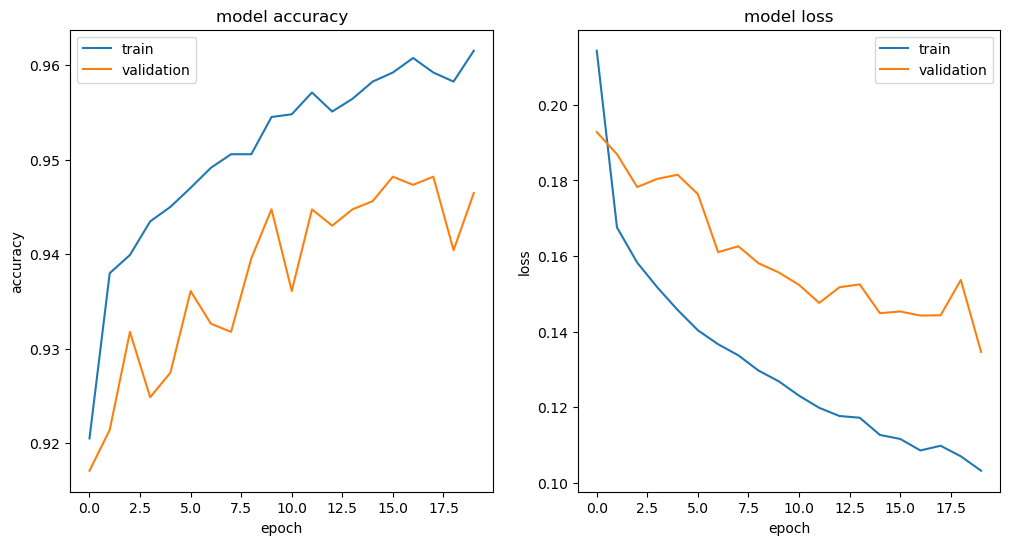

In [14]:
test_loss, test_acc = model.evaluate(data_test,  status_test, verbose=1) 

history_data(history)

121/121 [==============================] - 0s 1ms/step


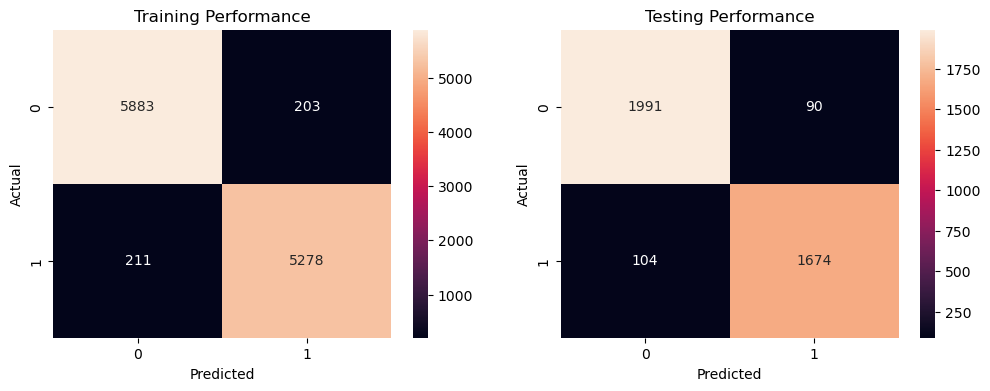

In [15]:
status_train_pred = (model.predict(data_train) >= 0.5).astype('int32')
status_test_pred = (model.predict(data_test) >= 0.5).astype('int32')
performance_data(status_train, status_train_pred, status_test, status_test_pred)